In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/Admin/INeuron/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

#### Perentage of missing values

In [4]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

## Methods for replacing NaN values

#### 1. Replacing NAN values with median

In [5]:
# Here we have created a function, which will take nan values and then replace it wth median

def impute_nan(df,variable,median):
    df[variable +'median']=df[variable].fillna(median)

In [6]:
median=df.Age.median()
median

28.0

In [7]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Agemedian
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


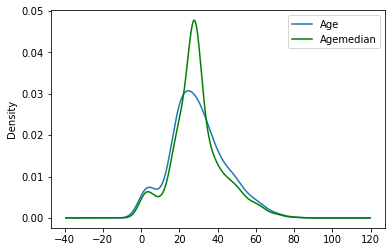

In [8]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde' ,ax=ax)
df.Agemedian.plot(kind='kde' ,ax=ax, color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [9]:
df.isnull().sum()

Survived       0
Age          177
Fare           0
Agemedian      0
dtype: int64

#### 2. Replacing NAN values with Random sample

In [10]:
# Here we have created a function, which will take random values from data set and then that values will be replaced the NAN values

def Impute_nan_1(df,variable,median):
    df[variable + "_random"]=df[variable]
    
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [11]:
Impute_nan_1(df,"Age",median)

In [12]:
df

,Survived,Age,Fare,Agemedian,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


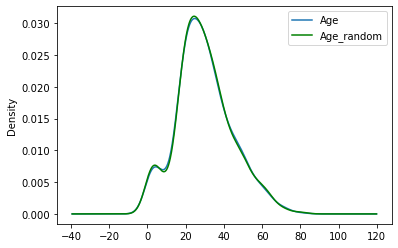

In [13]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde' ,ax=ax)
df.Age_random.plot(kind='kde' ,ax=ax, color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

#### 3. Capturing NaN values with a new sample

It works well if data ara not missing completely at random

In [14]:
df=pd.read_csv('C:/Users/Admin/INeuron/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [15]:
df["Age_NaN"]=np.where(df['Age'].isnull(),1,0)
df

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


#### 4. End of Distribution Imputation

In [16]:
df=pd.read_csv('C:/Users/Admin/INeuron/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:xlabel='Age'>

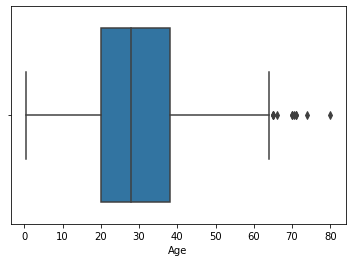

In [29]:
sns.boxplot("Age",data=df)

<AxesSubplot:>

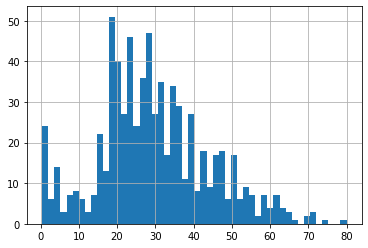

In [30]:
df.Age.hist(bins=50)

In [31]:
extreme=df.Age.mean()+3*df.Age.std()

In [32]:
def Impute_nan(df,variable,median,extreme):
    df[variable+'_end_extreme']=df[variable].fillna(extreme)
    df[variable]=df[variable].fillna(median)

In [33]:
Impute_nan(df,'Age',df.Age.median(),extreme)

In [34]:
df.head()

,Survived,Age,Fare,Age_zero,Age_hundred,Age_end_extreme
0,0,22.0,7.2500,22.0,22.0,22.0
1,1,38.0,71.2833,38.0,38.0,38.0
2,1,26.0,7.9250,26.0,26.0,26.0
3,1,35.0,53.1000,35.0,35.0,35.0
4,0,35.0,8.0500,35.0,35.0,35.0


<AxesSubplot:xlabel='Age_end_extreme'>

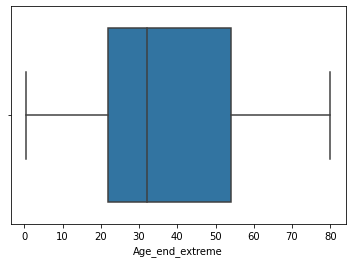

In [35]:
sns.boxplot('Age_end_extreme',data=df)  # Here we have removed outliers

#### 5. Arbitrary value imputation

It consists of replacing NAN by arbitrary value

In [23]:
df=pd.read_csv('C:/Users/Admin/INeuron/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [25]:
def Impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)    

In [26]:
Impute_nan(df,'Age')

<AxesSubplot:xlabel='Age_zero'>

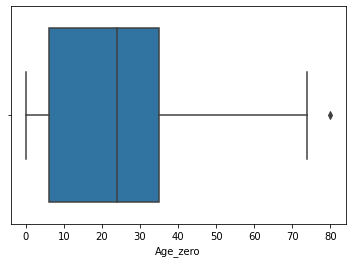

In [40]:
sns.boxplot('Age_zero',data=df)

<AxesSubplot:xlabel='Age_hundred'>

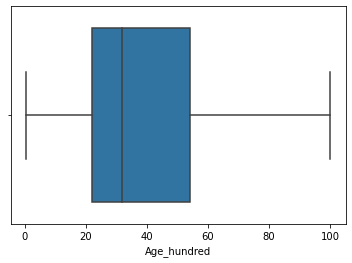

In [37]:
sns.boxplot('Age_hundred',data=df)

<AxesSubplot:>

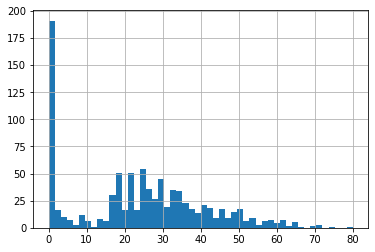

In [42]:
df.Age_zero.hist(bins=50)

<AxesSubplot:>

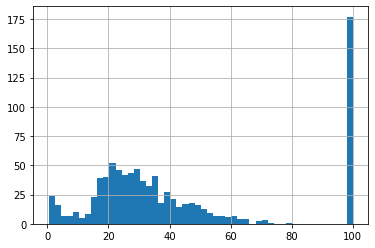

In [43]:
df.Age_hundred.hist(bins=50)

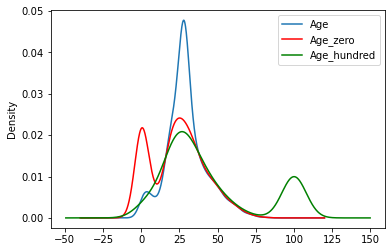

In [44]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde' ,ax=ax)
df.Age_zero.plot(kind='kde' ,ax=ax, color='red')
df.Age_hundred.plot(kind='kde' ,ax=ax, color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')